In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
inputpath = 'D:/data/Graduation/Contribution/Seasonally/contribution_hours_Seasonally/'
df_summer = pd.read_excel(inputpath + 'summer.xlsx',index_col=0)
df_autumn = pd.read_excel(inputpath + 'autumn.xlsx',index_col=0)

In [4]:
obs_summer = df_summer[['obs_2019','obs_2021','obs_2022']].mean(axis=1)
obs_autumn = df_autumn[['obs_2019','obs_2021','obs_2022']].mean(axis=1)

sim_summer = df_summer[['sim_2019','sim_2021','sim_2022']].mean(axis=1)
sim_autumn = df_autumn[['sim_2019','sim_2021','sim_2022']].mean(axis=1)

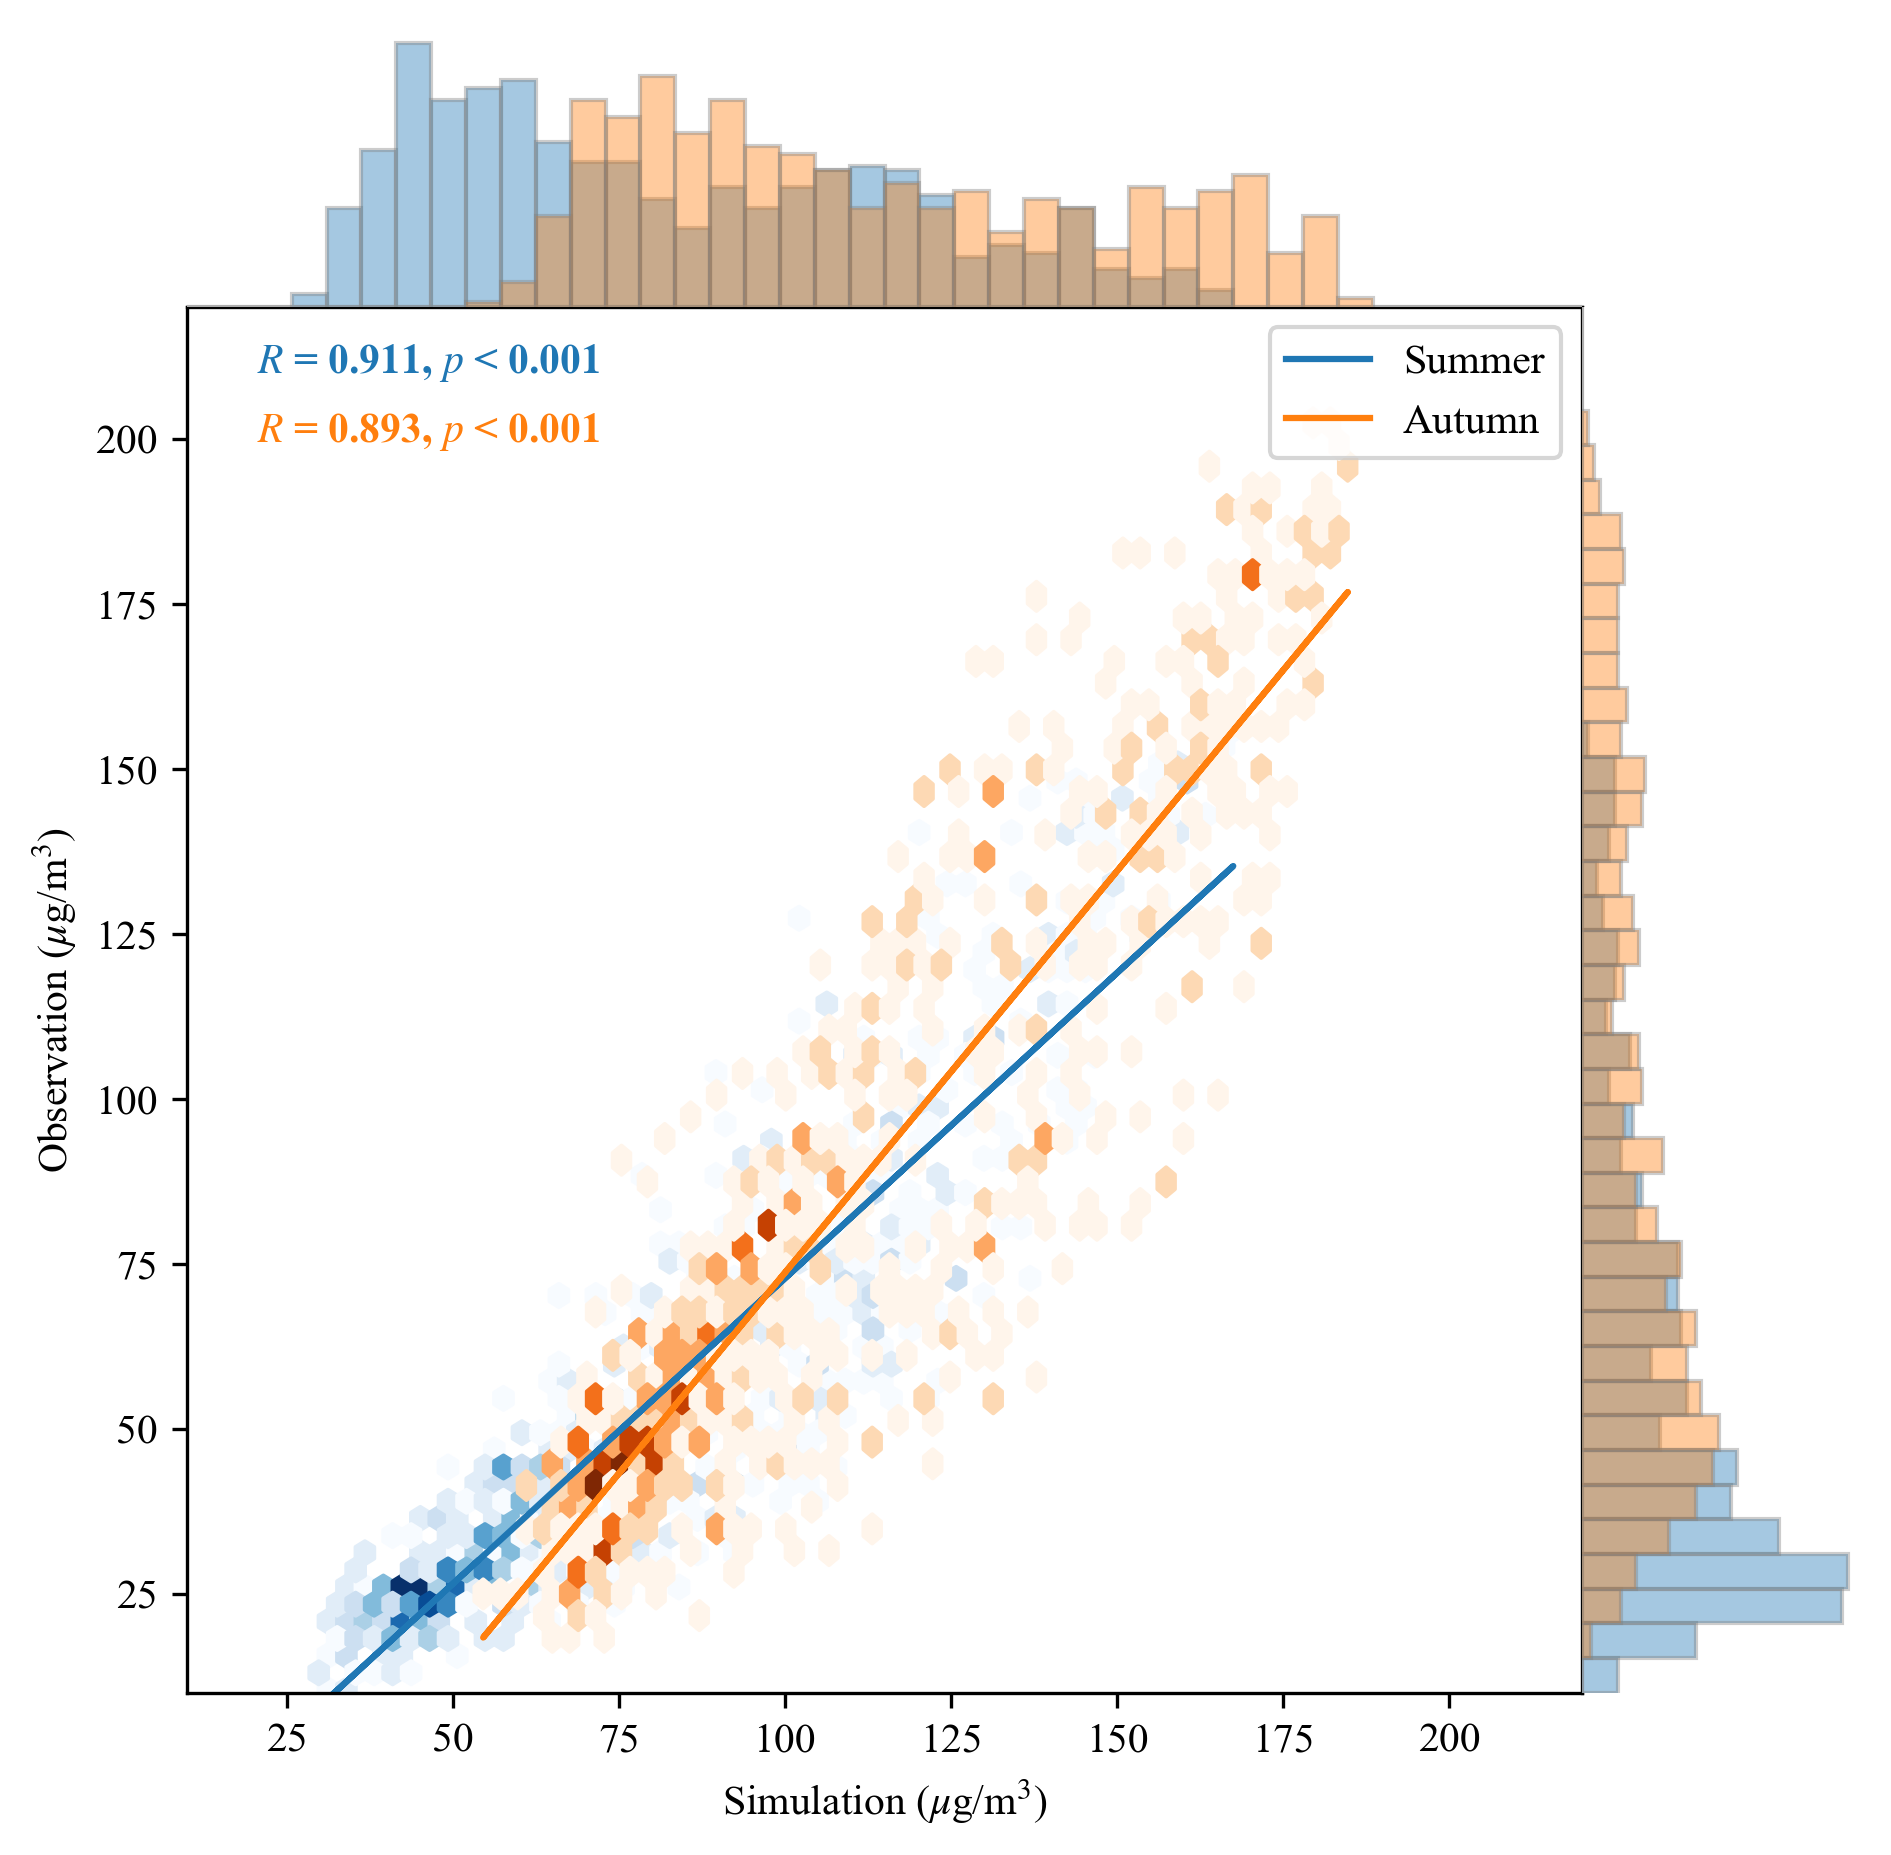

In [23]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(sim_summer.values, obs_summer.values)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(sim_autumn.values, obs_autumn.values)

xmin = 10
xmax = 220

dotdict = dict(
    s=20, 
    marker='o',
    alpha=0.5,
    edgecolors='None'
)

fig = plt.figure(figsize=(6, 6), dpi=300)

# 创建主图
ax = fig.add_subplot(111)
hb1 = ax.hexbin(sim_summer, obs_summer, gridsize=50, cmap='Blues', mincnt=1)
hb2 = ax.hexbin(sim_autumn, obs_autumn, gridsize=50, cmap='Oranges', mincnt=1)
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')

x1 = sim_summer
x2 = sim_autumn

# 添加回归线
ax.plot(x1, slope1 * x1 + intercept1, color='tab:blue', label='Summer')
ax.plot(x2, slope2 * x2 + intercept2, color='tab:orange', label='Autumn')
ax.legend(loc=1)

# 显示相关系数和 p 值
ax.text(0.05, 0.96, f'$R$ = {r_value1:.3f}, $p$ < 0.001', color='tab:blue', fontweight='bold', ha='left', va='center', transform=ax.transAxes)
ax.text(0.05, 0.91, f'$R$ = {r_value2:.3f}, $p$ < 0.001', color='tab:orange', fontweight='bold', ha='left', va='center', transform=ax.transAxes)

# 创建侧边的直方图
ax_sub1 = fig.add_axes([ax.get_position().x0, ax.get_position().y1, 
                        ax.get_position().width, ax.get_position().height/5])

bins1 = np.histogram_bin_edges(np.hstack((sim_summer, sim_autumn)), bins=40, range=(xmin, xmax))
ax_sub1.hist(sim_summer, color='tab:blue', alpha=0.4, bins=bins1, edgecolor='gray')
ax_sub1.hist(sim_autumn, color='tab:orange', alpha=0.4, bins=bins1, edgecolor='gray')
ax_sub1.set_xlim(xmin, xmax)

ax_sub2 = fig.add_axes([ax.get_position().x1, ax.get_position().y0, 
                        ax.get_position().width/5, ax.get_position().height])

bins2 = np.histogram_bin_edges(np.hstack((obs_summer, obs_autumn)), bins=40, range=(xmin, xmax))
ax_sub2.hist(obs_summer, color='tab:blue', alpha=0.4, bins=bins2, edgecolor='gray', orientation='horizontal')
ax_sub2.hist(obs_autumn, color='tab:orange', alpha=0.4, bins=bins2, edgecolor='gray', orientation='horizontal')
ax_sub2.set_ylim(xmin, xmax)
for axe in [ax_sub1, ax_sub2]:
    axe.set_xticks([])
    axe.set_yticks([])
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)
    axe.spines['bottom'].set_visible(False)
    axe.spines['left'].set_visible(False)

plt.show()


In [28]:
df_year = pd.read_excel(datadir + 'Contribution/Annually/contribution_hours.xlsx',index_col=0)
sim_high_list = ['sim_2019','sim_2021','sim_2022']
obs_high_list = ['obs_2019','obs_2021','obs_2022']
sim_high = df_year[sim_high_list].mean(axis=1)
obs_high = df_year[obs_high_list].mean(axis=1)

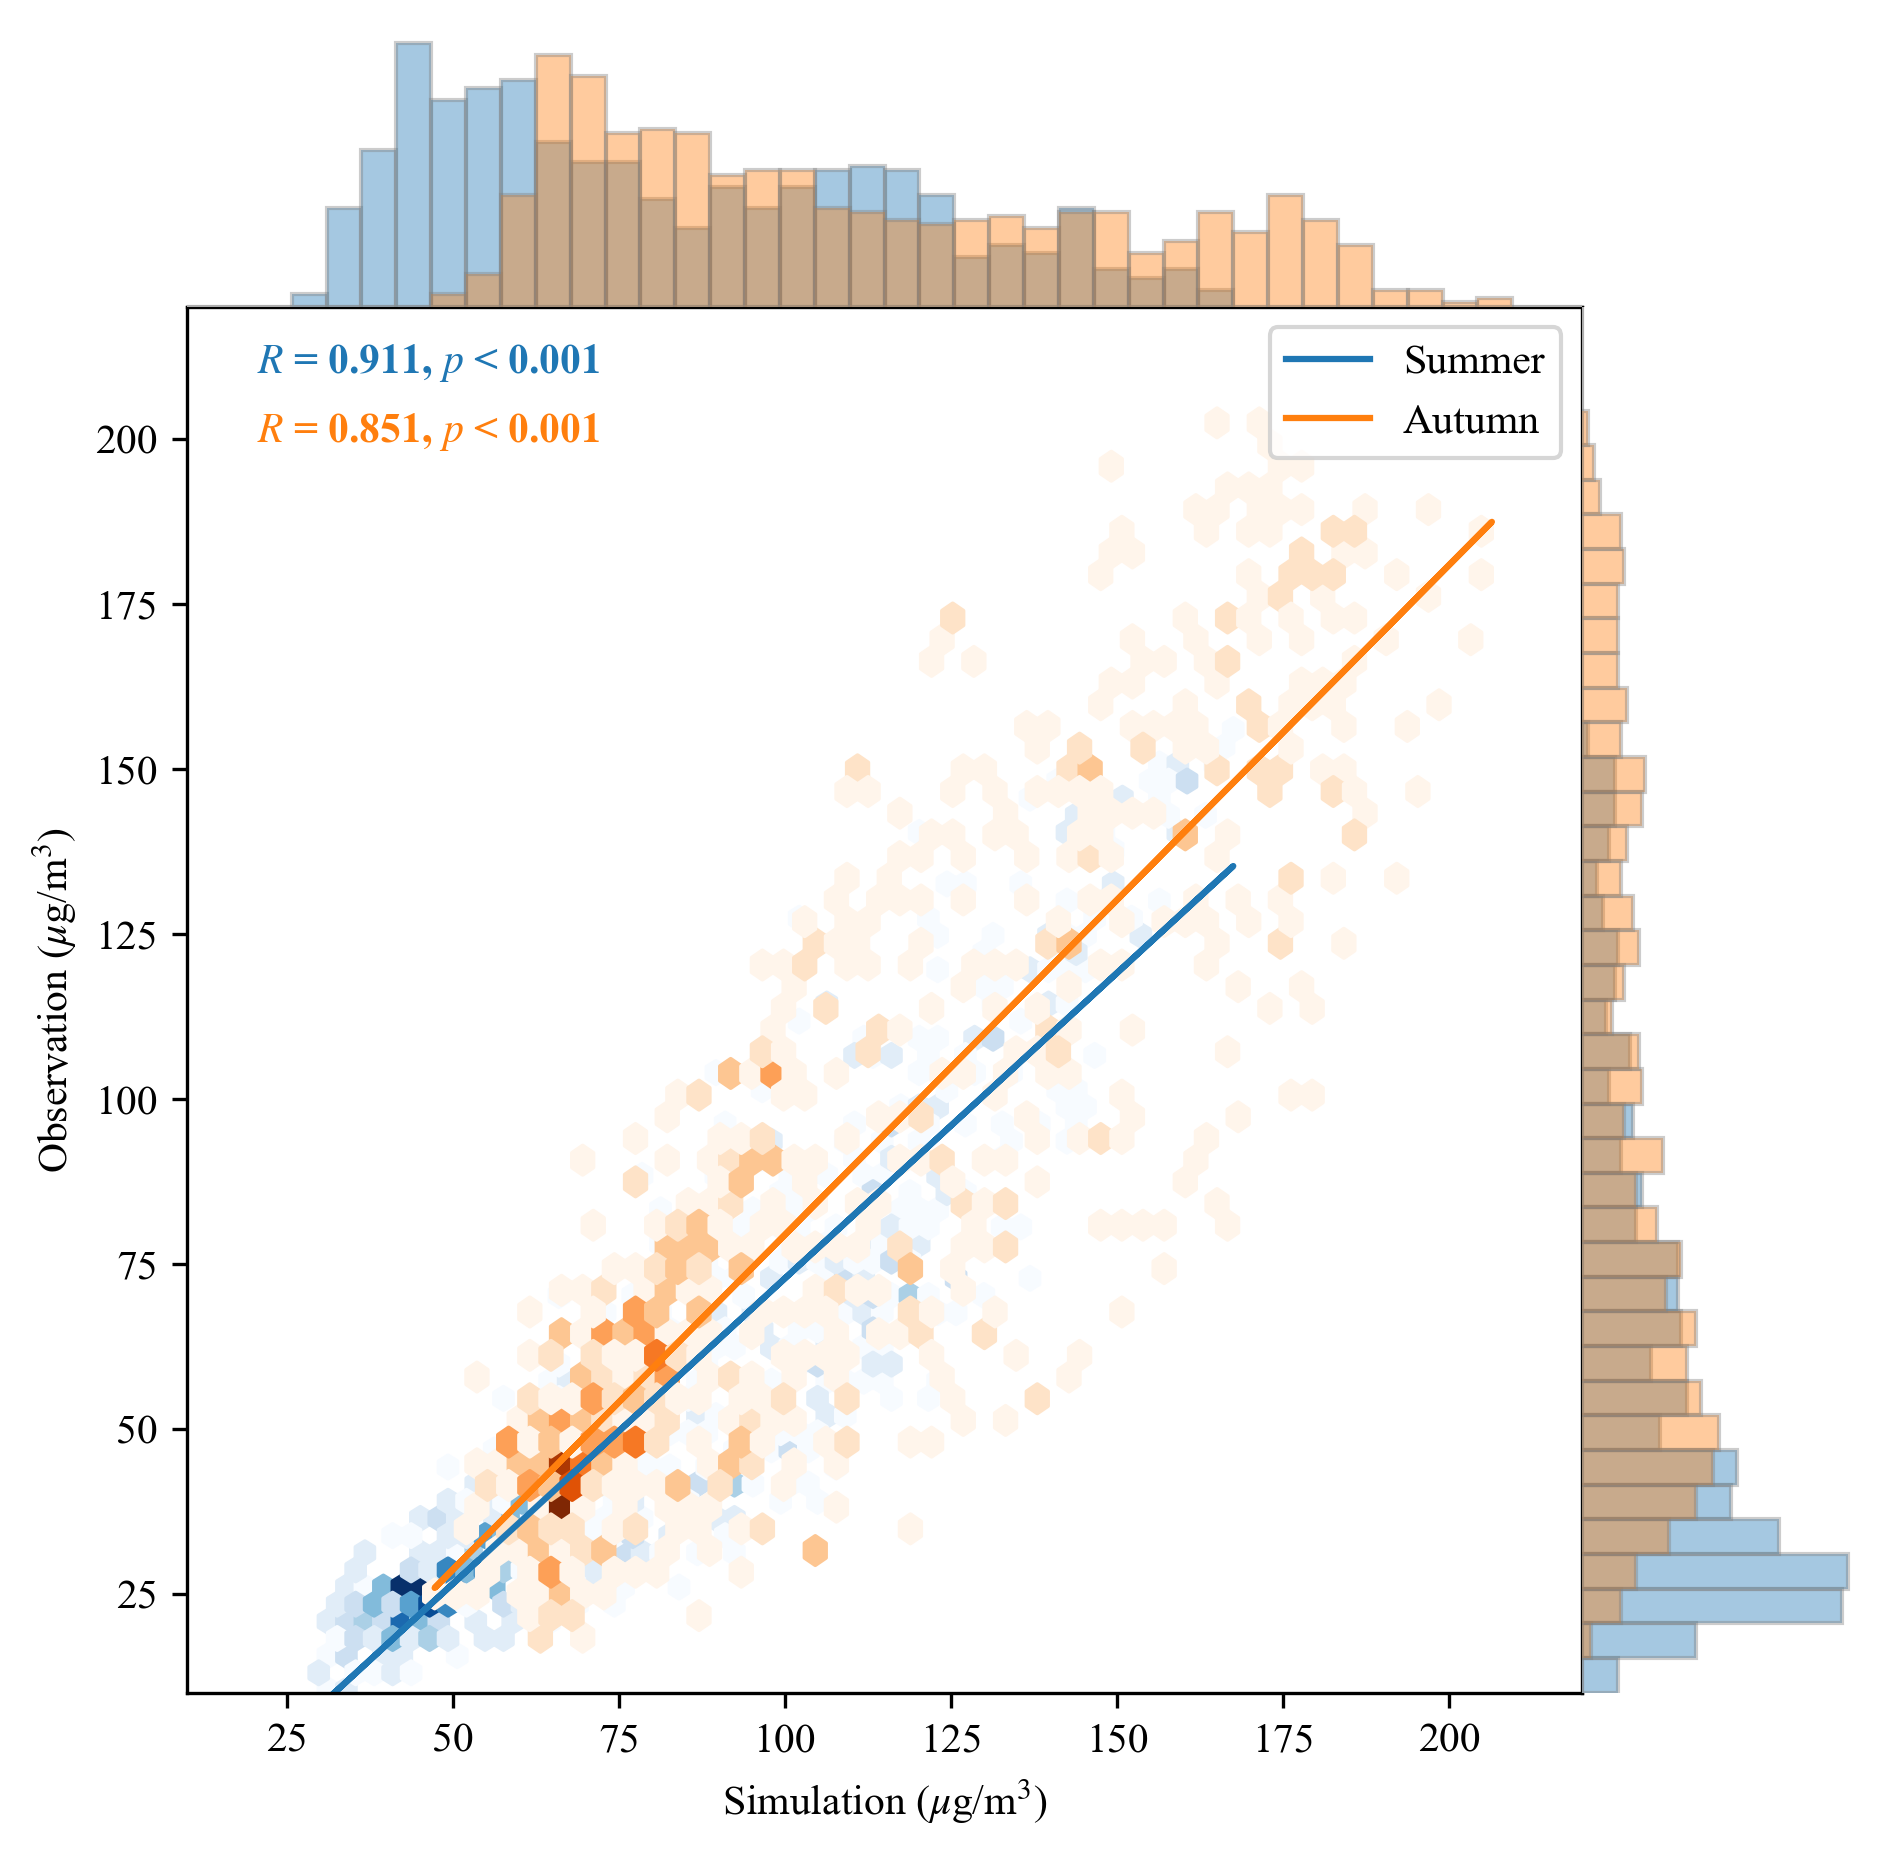

In [29]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(sim_summer.values, obs_summer.values)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(sim_high.values, obs_high.values)

xmin = 10
xmax = 220

dotdict = dict(
    s=20, 
    marker='o',
    alpha=0.5,
    edgecolors='None'
)

fig = plt.figure(figsize=(6, 6), dpi=300)

# 创建主图
ax = fig.add_subplot(111)
hb1 = ax.hexbin(sim_summer, obs_summer, gridsize=50, cmap='Blues', mincnt=1)
hb2 = ax.hexbin(sim_high, obs_high, gridsize=50, cmap='Oranges', mincnt=1)
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')

x1 = sim_summer
x2 = sim_high

# 添加回归线
ax.plot(x1, slope1 * x1 + intercept1, color='tab:blue', label='Summer')
ax.plot(x2, slope2 * x2 + intercept2, color='tab:orange', label='Autumn')
ax.legend(loc=1)

# 显示相关系数和 p 值
ax.text(0.05, 0.96, f'$R$ = {r_value1:.3f}, $p$ < 0.001', color='tab:blue', fontweight='bold', ha='left', va='center', transform=ax.transAxes)
ax.text(0.05, 0.91, f'$R$ = {r_value2:.3f}, $p$ < 0.001', color='tab:orange', fontweight='bold', ha='left', va='center', transform=ax.transAxes)

# 创建侧边的直方图
ax_sub1 = fig.add_axes([ax.get_position().x0, ax.get_position().y1, 
                        ax.get_position().width, ax.get_position().height/5])

bins1 = np.histogram_bin_edges(np.hstack((sim_summer, sim_high)), bins=40, range=(xmin, xmax))
ax_sub1.hist(sim_summer, color='tab:blue', alpha=0.4, bins=bins1, edgecolor='gray')
ax_sub1.hist(sim_high, color='tab:orange', alpha=0.4, bins=bins1, edgecolor='gray')
ax_sub1.set_xlim(xmin, xmax)

ax_sub2 = fig.add_axes([ax.get_position().x1, ax.get_position().y0, 
                        ax.get_position().width/5, ax.get_position().height])

bins2 = np.histogram_bin_edges(np.hstack((obs_summer, obs_high)), bins=40, range=(xmin, xmax))
ax_sub2.hist(obs_summer, color='tab:blue', alpha=0.4, bins=bins2, edgecolor='gray', orientation='horizontal')
ax_sub2.hist(obs_high, color='tab:orange', alpha=0.4, bins=bins2, edgecolor='gray', orientation='horizontal')
ax_sub2.set_ylim(xmin, xmax)
for axe in [ax_sub1, ax_sub2]:
    axe.set_xticks([])
    axe.set_yticks([])
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)
    axe.spines['bottom'].set_visible(False)
    axe.spines['left'].set_visible(False)

plt.show()
